# Lab Assignment One: Exploring Table Data
Name: Marc Pham

## 1. Business Understanding

The data, funded by the Instituto Politécnico de Portalegre on April 23, 2021, aims to identify students at risk of dropping out of higher education.  The dataset includes 4,424 students who are classified as dropouts, current enrollees, or graduates.  For each student, the data includes 37 total features, including demographic features (e.g., race and gender) and economic factors (e.g., the inflation rate and unemployment rate at the time of their application) that may influence their likelihood for dropping out.  The funders’ original goal was to use machine learning techniques to detect which students are at risk of dropping out and implement targeted interventions, such as scholarships, to support these students.
</br></br>
The end goal of analyzing this dataset is to classify a student as a potential dropout or an enrollee/graduate based on economic factors and each student’s demographic features.  The results can help university admissions offices and government agencies determine which groups of students need additional support to get through higher education.  However, it is important to note that third parties could use these results to choose which students to accept or deny from a university.  Keeping this in mind, the final classification algorithm should not be trained on race since the Supreme Court banned the use of race in college admissions.
</br></br>
For the algorithm to be successful, we need the algorithm to accurately classify which students are dropping out.  It is less important if the model inaccurately predicts an Enrollee as a Graduate or vice versa.  As a result, we should use metrics like precision and recall to measure how well the algorithm does at classifying dropouts.  For our algorithm, recall measures the percentage of actual dropouts that the algorithm correctly classifies.  Our recall should be as close as possible to 100% to minimize the probability of missing any students at risk of dropping out.  Precision measures the percentage of students predicted to drop out who are actual dropouts.  Low precision means we are giving additional resources to many students not at risk of dropping out, while high precision means that resources are used effectively.  Although high precision is ideal, it would be acceptable to have lower precision, like 70%, if it significantly increases recall.  The balance between precision and recall will depend on how much financial flexibility institutions have.


Sources: [Dataset](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success) </br>
M.V.Martins, D. Tolledo, J. Machado, L. M.T. Baptista, V.Realinho. (2021) "Early prediction of student’s performance in higher education: a case study" Trends and Applications in Information Systems and Technologies, vol.1, in Advances in Intelligent Systems and Computing series. Springer. DOI: 10.1007/978-3-030-72657-7_16

## 2. Data Understanding

### 2.1: Data Description

The dataset has a total of 37 features, so we will discuss 10 of the most relevant attributes.  The Target attribute, which is what we are aiming to predict, classifies students as Dropouts, Enrollees, or Graduates.  This attribute will replace Dropouts with 1, Enrollees with 2, and Graduates with 3.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data.csv', sep=';')
df = df.rename(columns = {
    'Daytime/evening attendance\t' : 'Daytime/evening attendance',               
    'Nacionality': 'Nationality'})

df['Target'].replace({'Dropout' : 1, 'Enrolled' : 2, 'Graduate' : 3}, inplace=True)

df_relevant = df[[
    'Curricular units 2nd sem (approved)',
    'International',
    'Curricular units 2nd sem (grade)',
    'Gender',
    'Scholarship holder',
    'Age at enrollment',
    'Unemployment rate',
    'Inflation rate',
    'GDP',
    'Target'
]]
df_relevant.head()

,Curricular units 2nd sem (approved),International,Curricular units 2nd sem (grade),Gender,Scholarship holder,Age at enrollment,Unemployment rate,Inflation rate,GDP,Target
0,0,0,0.000000,1,0,20,10.8,1.4,1.74,1
1,6,0,13.666667,1,0,19,13.9,-0.3,0.79,3
2,0,0,0.000000,1,0,19,10.8,1.4,1.74,1
3,5,0,12.400000,0,0,20,9.4,-0.8,-3.12,3
4,6,0,13.000000,0,0,45,13.9,-0.3,0.79,3


The following table has descriptions and data types for each of the 10 relevant attributes.

In [53]:
data_types = pd.DataFrame()
data_types['Variables'] = df_relevant.columns
data_types['Type of Variable'] = ['Discrete Ratio','Discrete Nominal','Continuous Ratio','Discrete Nominal','Discrete Nominal','Discrete Ratio','Continuous Ratio','Continuous Ratio','Continuous Ratio','Discrete Nominal']
data_types['Data Type'] = ['Integer','Integer (Binary)','Integer (Binary)','Integer (Binary)','Integer (Binary)','Integer','Float','Float','Float','Integer']
data_types['Descriptions'] = [
    'Number of academic units that the student passed in their second semester',
    'Yes, an international student or No',
    'Student\'s grade average in the 2nd semester (Range: 0-20)',
    'Male or Female',
    'Yes, Has a Scholarship or No Scholarship',
    'Student\'s age in years (Integer) at enrollment',
    'Percentage of people who are unemployed',
    'Rate at which prices increase over time',
    'Total output of goods produced by an economy over a time period',
    'Dropout, Graduate, or Enrolled'
]

# Allows you to view the entire long string.
pd.options.display.max_colwidth = 100
data_types

,Variables,Type of Variable,Data Type,Descriptions
0,Curricular units 2nd sem (approved),Discrete Ratio,Integer,Number of academic units that the student passed in their second semester
1,International,Discrete Nominal,Integer (Binary),"Yes, an international student or No"
2,Curricular units 2nd sem (grade),Continuous Ratio,Integer (Binary),Student's grade average in the 2nd semester (Range: 0-20)
3,Gender,Discrete Nominal,Integer (Binary),Male or Female
4,Scholarship holder,Discrete Nominal,Integer (Binary),"Yes, Has a Scholarship or No Scholarship"
5,Age at enrollment,Discrete Ratio,Integer,Student's age in years (Integer) at enrollment
6,Unemployment rate,Continuous Ratio,Float,Percentage of people who are unemployed
7,Inflation rate,Continuous Ratio,Float,Rate at which prices increase over time
8,GDP,Continuous Ratio,Float,Total output of goods produced by an economy over a time period
9,Target,Discrete Nominal,Integer,"Dropout, Graduate, or Enrolled"


### 2.2: Data Quality

Before analyzing the data, it is important to identify any missing values, duplicate data, and outliers in the dataset.  Looking at the attributes, all attributes seem useful in in the analysis.

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nationality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

Information from the dataframe shows that, out of 4424 instances, there are no missing values for any of the 10 attributes.  If missing values existed in the dataset, we could use K-Nearest Neighbors Imputation for numeric features and use the mode to impute categorical variables.

In [104]:
num_dupes = len(df[df.duplicated()])
print(f"Number of Duplicates: {num_dupes}")

Number of Duplicates: 0


If we examine the dataset with all available attributes, we find that there are 0 duplicated instances.  This is likely because the data was already pre-processed to remove any duplicates.

In [3]:
numeric_variables = [
    'Previous qualification (grade)',
    'Admission grade',
    'Age at enrollment',
    'Unemployment rate',
    'Inflation rate',
    'GDP',
    'Curricular units 1st sem (credited)',
   'Curricular units 1st sem (enrolled)',
   'Curricular units 1st sem (evaluations)',
   'Curricular units 1st sem (approved)',
   'Curricular units 1st sem (grade)',
   'Curricular units 1st sem (without evaluations)',
   'Curricular units 2nd sem (credited)',
   'Curricular units 2nd sem (enrolled)',
   'Curricular units 2nd sem (evaluations)',
   'Curricular units 2nd sem (approved)',
   'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (without evaluations)', 
]

# Gets only the min and max from the 5-number summary.
df[numeric_variables[0:6]].describe().iloc[[3,7]]

,Previous qualification (grade),Admission grade,Age at enrollment,Unemployment rate,Inflation rate,GDP
min,95.0,95.0,17.0,7.6,-0.8,-4.06
max,190.0,190.0,70.0,16.2,3.7,3.51


In [8]:
df[numeric_variables[6:]].describe().iloc[[3,7]]

,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations)
min,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
max,20.0,26.0,45.0,26.0,18.875,12.0,19.0,23.0,33.0,20.0,18.571429,12.0


Looking at the minimum and maximum values of each numeric variable, we can get a rough idea about the presence of outliers in our data. Overall, the numeric variables appear to have reasonable values. The Age at enrollment spans from 17 to 70. While students who are 70 years old are rare, they do exist and should be accounted for in the data.  Values for the Unemployment rate, Inflation rate, and GDP are reasonable when compared to the minimum and maximum values of these variables in Portugal. For example, Portugal's inflation rate moved between from -0.8% to 31.0% from 1960 to 2023.  Portugal's unemployment rate had an all-time low of 5% in 2000 and an all-time high of 18.3% in 2013. Portugal's GDP growth rate ranged from -14% to 21% from 2000 to 2022. 
The data regarding Curricular units also seem to have reasonable values. In Portugal, students usually take up to 30 credit hours per semester, which is around the maximum value for Curricular units (enrolled). However, this may differ from university to university, so it is difficult to determine if outliers exist.

Sources: [Portugal's Inflation Rate](https://www.worlddata.info/europe/portugal/inflation-rates.php#:~:text=The%20inflation%20rate%20for%20consumer,rate%20was%208.0%25%20per%20year.), 
[Portugal's Unemployment Rate](https://tradingeconomics.com/portugal/unemployment-rate#:~:text=Unemployment%20Rate%20in%20Portugal%20decreased,source%3A%20Statistics%20Portugal),
[Portugal's GDP](https://tradingeconomics.com/portugal/gdp), [Portugal's Education System](https://www.eurashe.eu/wp-content/uploads/2022/02/sche-portugal-addendum.pdf)
</br></br>Later in *Section 3.1: Data Exploration*, we show several histograms and boxplots that explore the presence of outliers in more depth.

## 3. Data Visualization

## 3.1: Data Exploration

### 3.1.1: Distribution of Age

In [31]:
pd.DataFrame(df['Age at enrollment'].describe()).transpose()

,count,mean,std,min,25%,50%,75%,max
Age at enrollment,4424.0,23.265145,7.587816,17.0,19.0,20.0,25.0,70.0


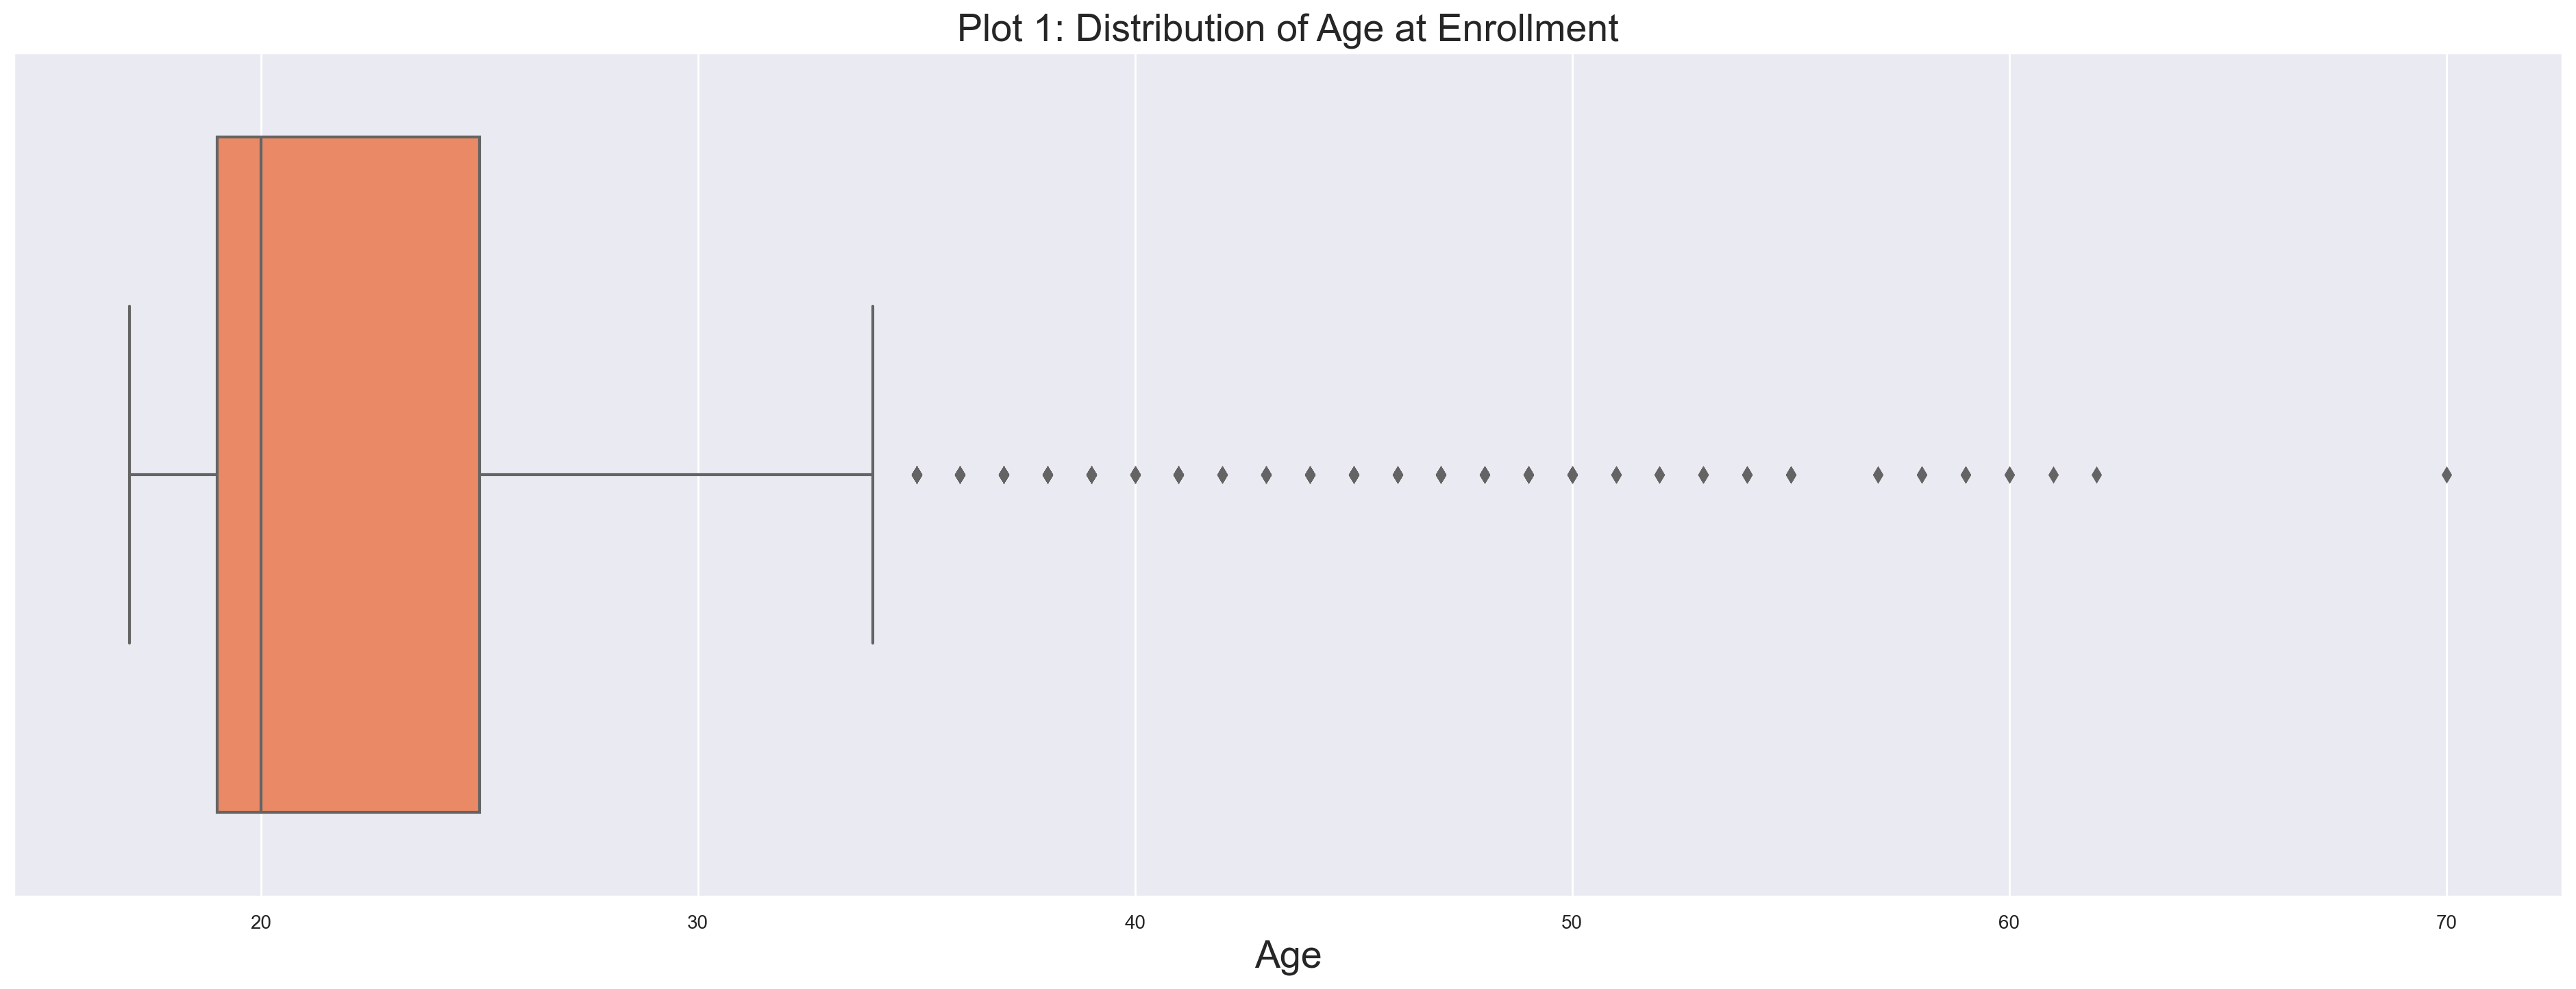

In [45]:
fig, axes = plt.subplots(1,1, figsize=(24,8), dpi=200)

sns.boxplot(data=df['Age at enrollment'], orient='h', color='coral');
plt.yticks([1], ['Age']);
plt.xticks(fontsize=10)
plt.xlabel('Age', fontsize=20);
plt.margins(x=0.05, y=0)
plt.title('Plot 1: Distribution of Age at Enrollment', fontsize=20);

The distribution of Age at Enrollment is skewed right with a median age of 20 years. This pattern is expected as most university students typically are in their late teens to their early twenties.  The distribution also identifies several outliers among the 4,424 students. According to the IQR Rule to determine outliers, these outliers had ages greater than $1.5\times(Q_3-Q_1)+Q_3=2=34$ years old. These outliers, however, are not likely due to data collection errors but rather reflect the diversity within the student population.  Students older than 34 may be rare, but they should be accounted for in the data.


### 3.1.2: Distribution of Economic Variables
Economic Variables: Unemployment Rate, Inflation Rate, GDP

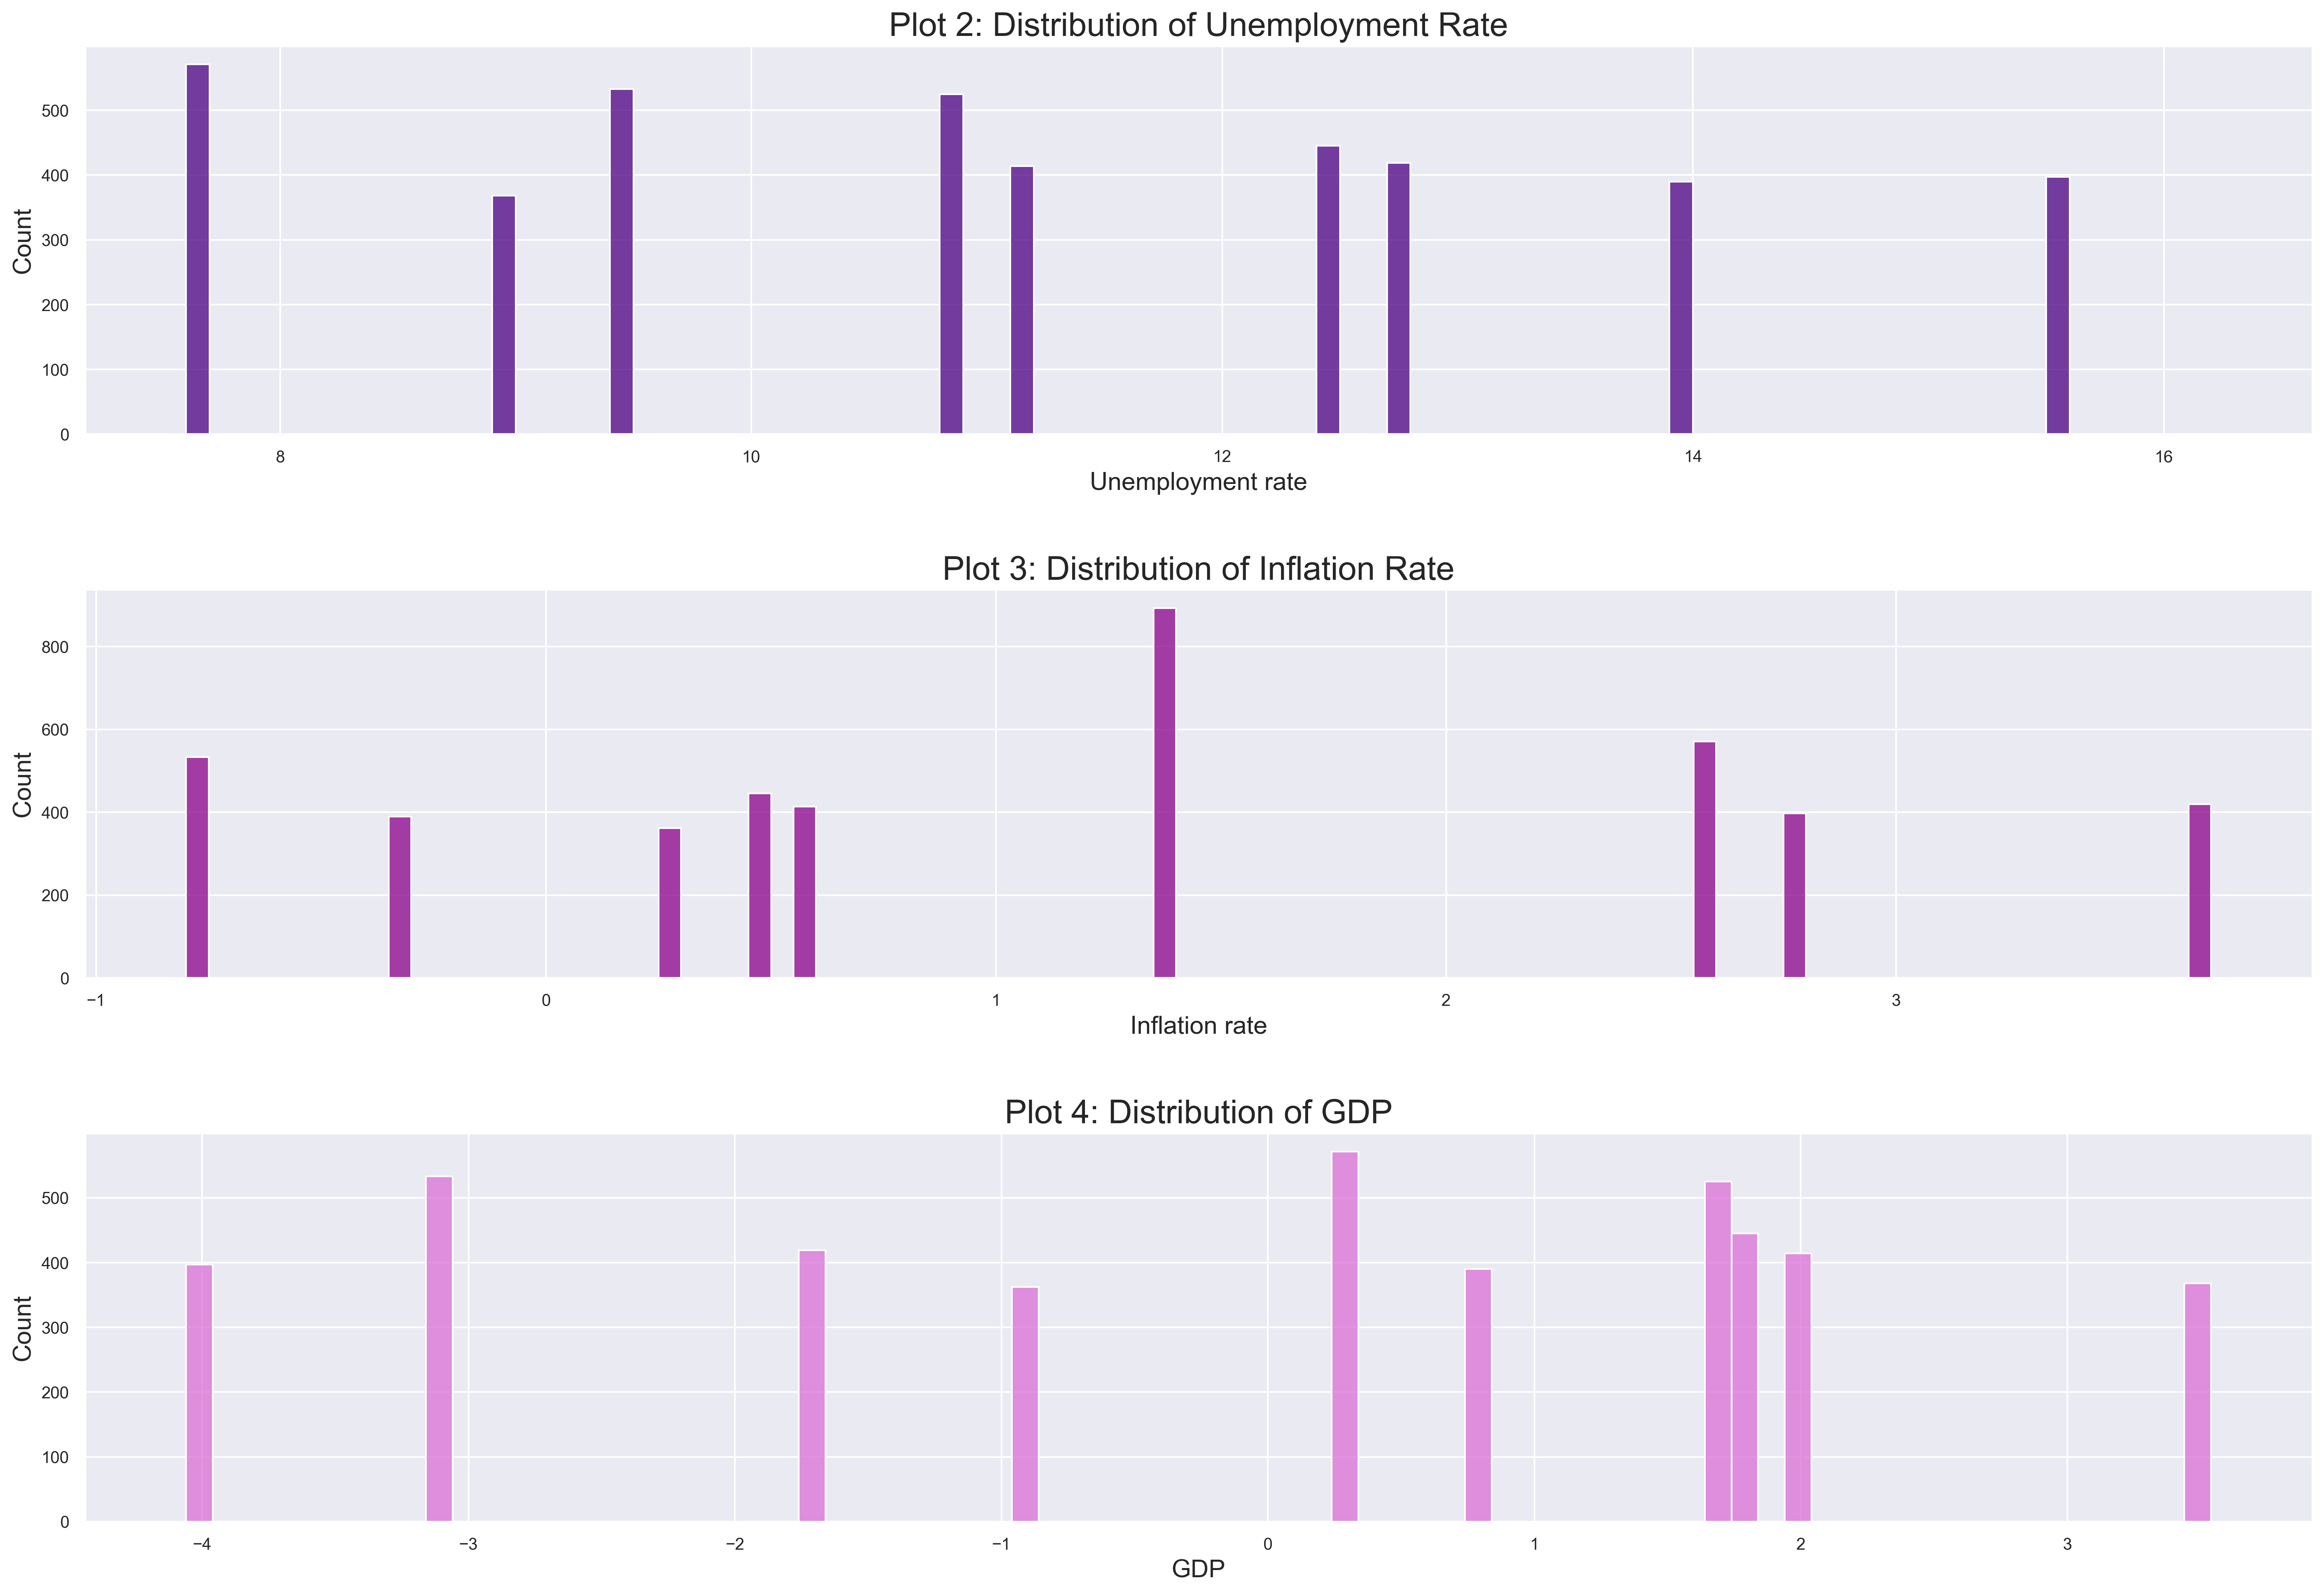

In [48]:
fig = plt.figure(figsize=(24,16), dpi=300)
plt.subplots_adjust(hspace=0.4)
# f, axes = plt.subplots(1,3, figsize=(24,6))

econ_var = ['Unemployment rate','Inflation rate','GDP']
titles = ['Plot 2: Distribution of Unemployment Rate','Plot 3: Distribution of Inflation Rate','Plot 4: Distribution of GDP']
binwidths = [0.1,0.05,0.1]
colors = ['indigo', 'darkmagenta', 'orchid']

for i in range(0, len(econ_var)):
    plt.subplot(3,1,i+1)
    sns.histplot(df[econ_var[i]], binwidth=binwidths[i], color=colors[i])
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlabel(econ_var[i], fontsize=15);
    plt.ylabel('Count', fontsize=15);
    plt.title(titles[i], fontsize=20);

The distribution of the economic variables in the dataset reveals that, although these variables are continuous numbers in nature, they only have a finite set of values in this dataset. This pattern arises because the data collectors likely got information from students at distinct points in time.  As a result, every student that got their info collected at one point in time would have the same value for their unemployment rate, inflation rate, and GDP.  Specifically, there appears to be 9 unique values for unemployment rate and inflation rate and 10 unique values for GDP.  This suggests that information about students in this dataset came from at most 10 distinct moments in time.

### 3.1.3: Distribution of International Students

In [27]:
df_inter = df[['International', 'Target']].copy()

df_inter['Target'].replace({2:0, 3:0}, inplace=True)
df_inter['Target'].replace({0:1, 1:0}, inplace=True)
# Dropouts = 0, Non-Dropouts = 1

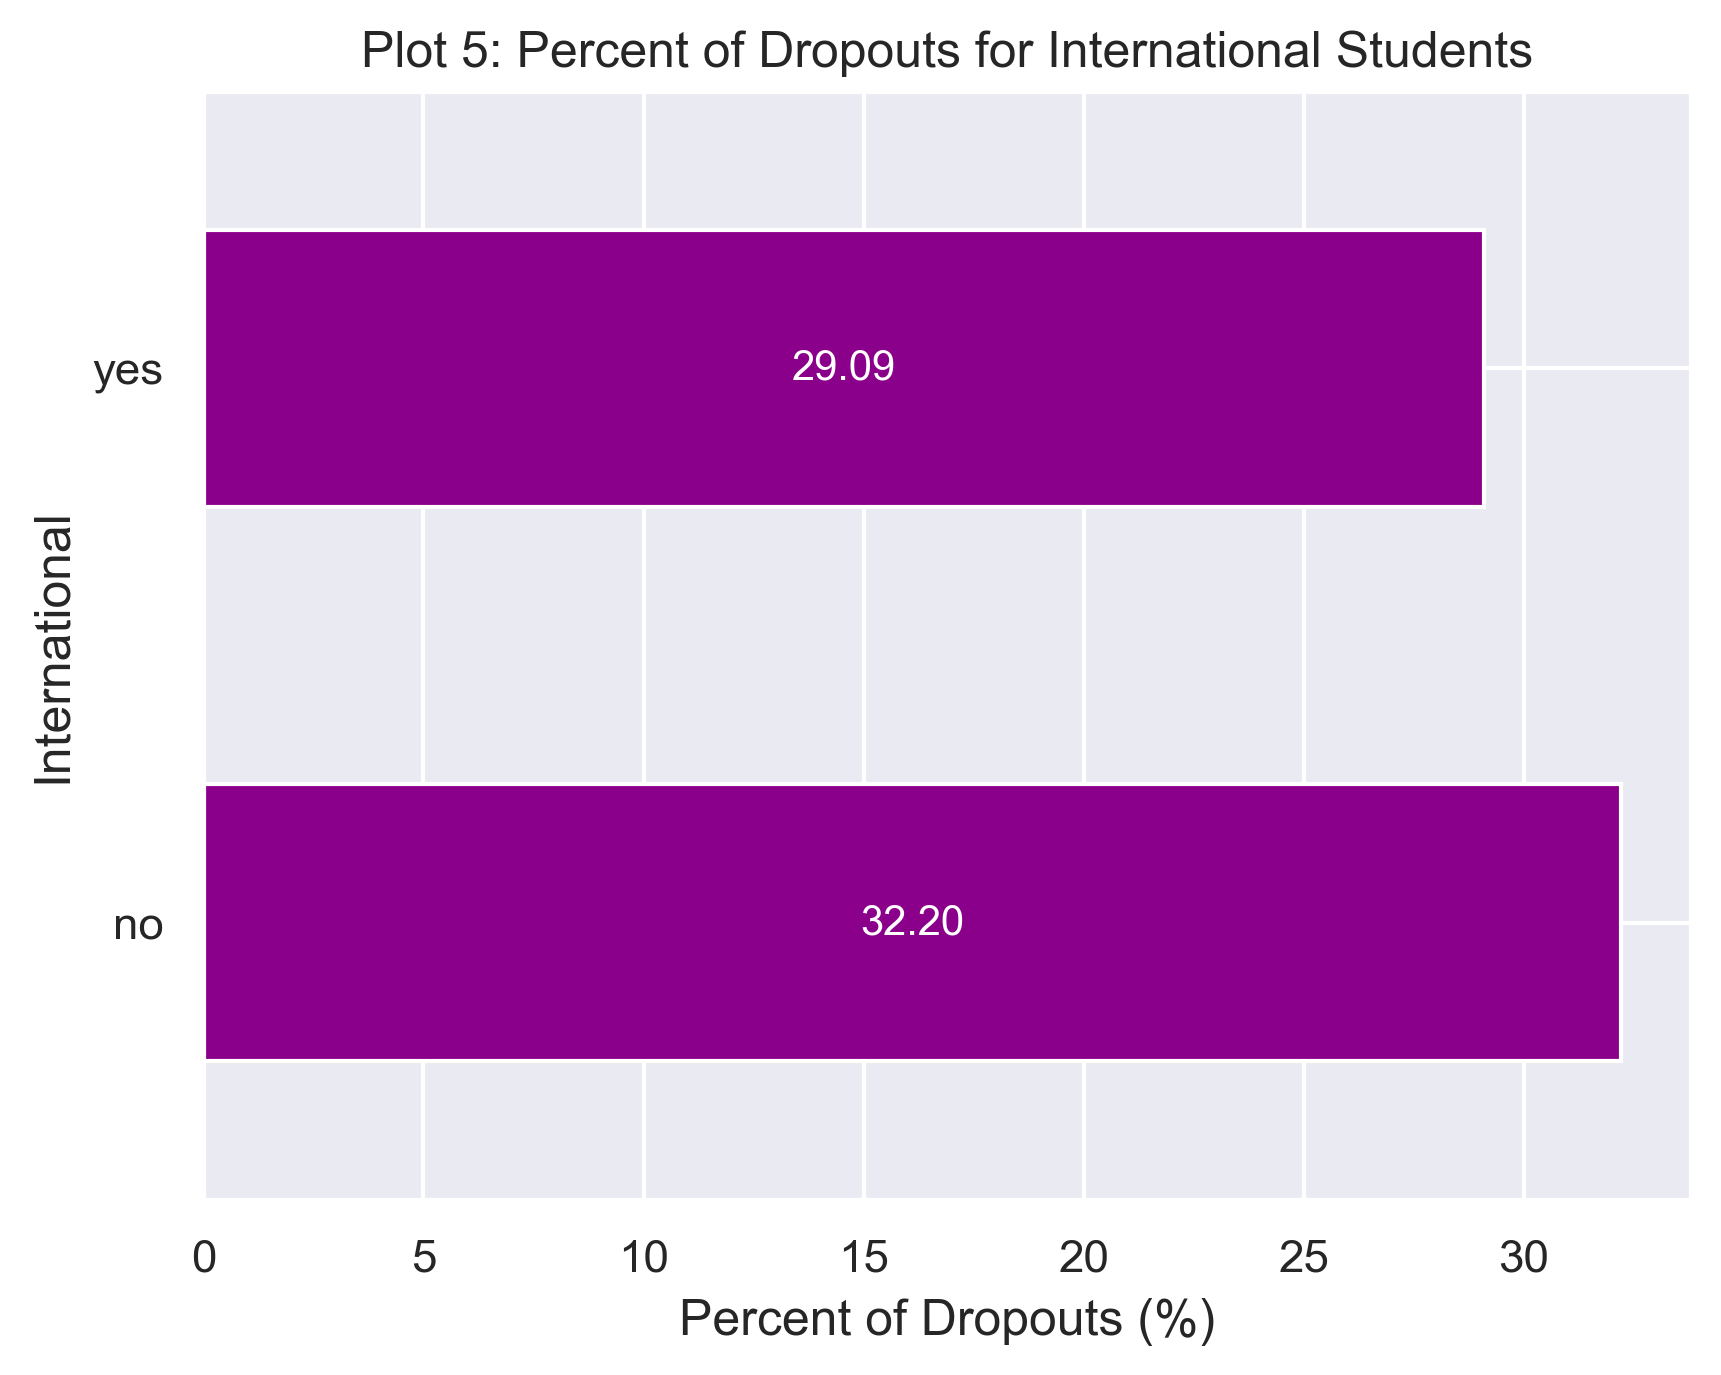

In [51]:
fig, ax = plt.subplots(dpi=300)
df_grouped1 = df_inter.groupby(by=['International'])
dropout_percent = 100 * (1 - (df_grouped1['Target'].sum() / df_grouped1['Target'].count()))
colors=['darkmagenta']

ax = dropout_percent.plot(kind='barh', color=colors)
ax.set_ylabel('International');
ax.set_yticks(ticks=[0,1],labels=['no', 'yes'])
ax.set_xlabel('Percent of Dropouts (%)');
ax.set_title('Plot 5: Percent of Dropouts for International Students');
ax.bar_label(ax.containers[0],fontsize=10,fmt='%0.2f',label_type='center',color='white');


The percent of dropouts for International and Non-International Students are close to one another, showing that the International feature and the percent of dropouts are not strongly linked. So, the International feature likely will not be helpful in predicting if a student will drop out.

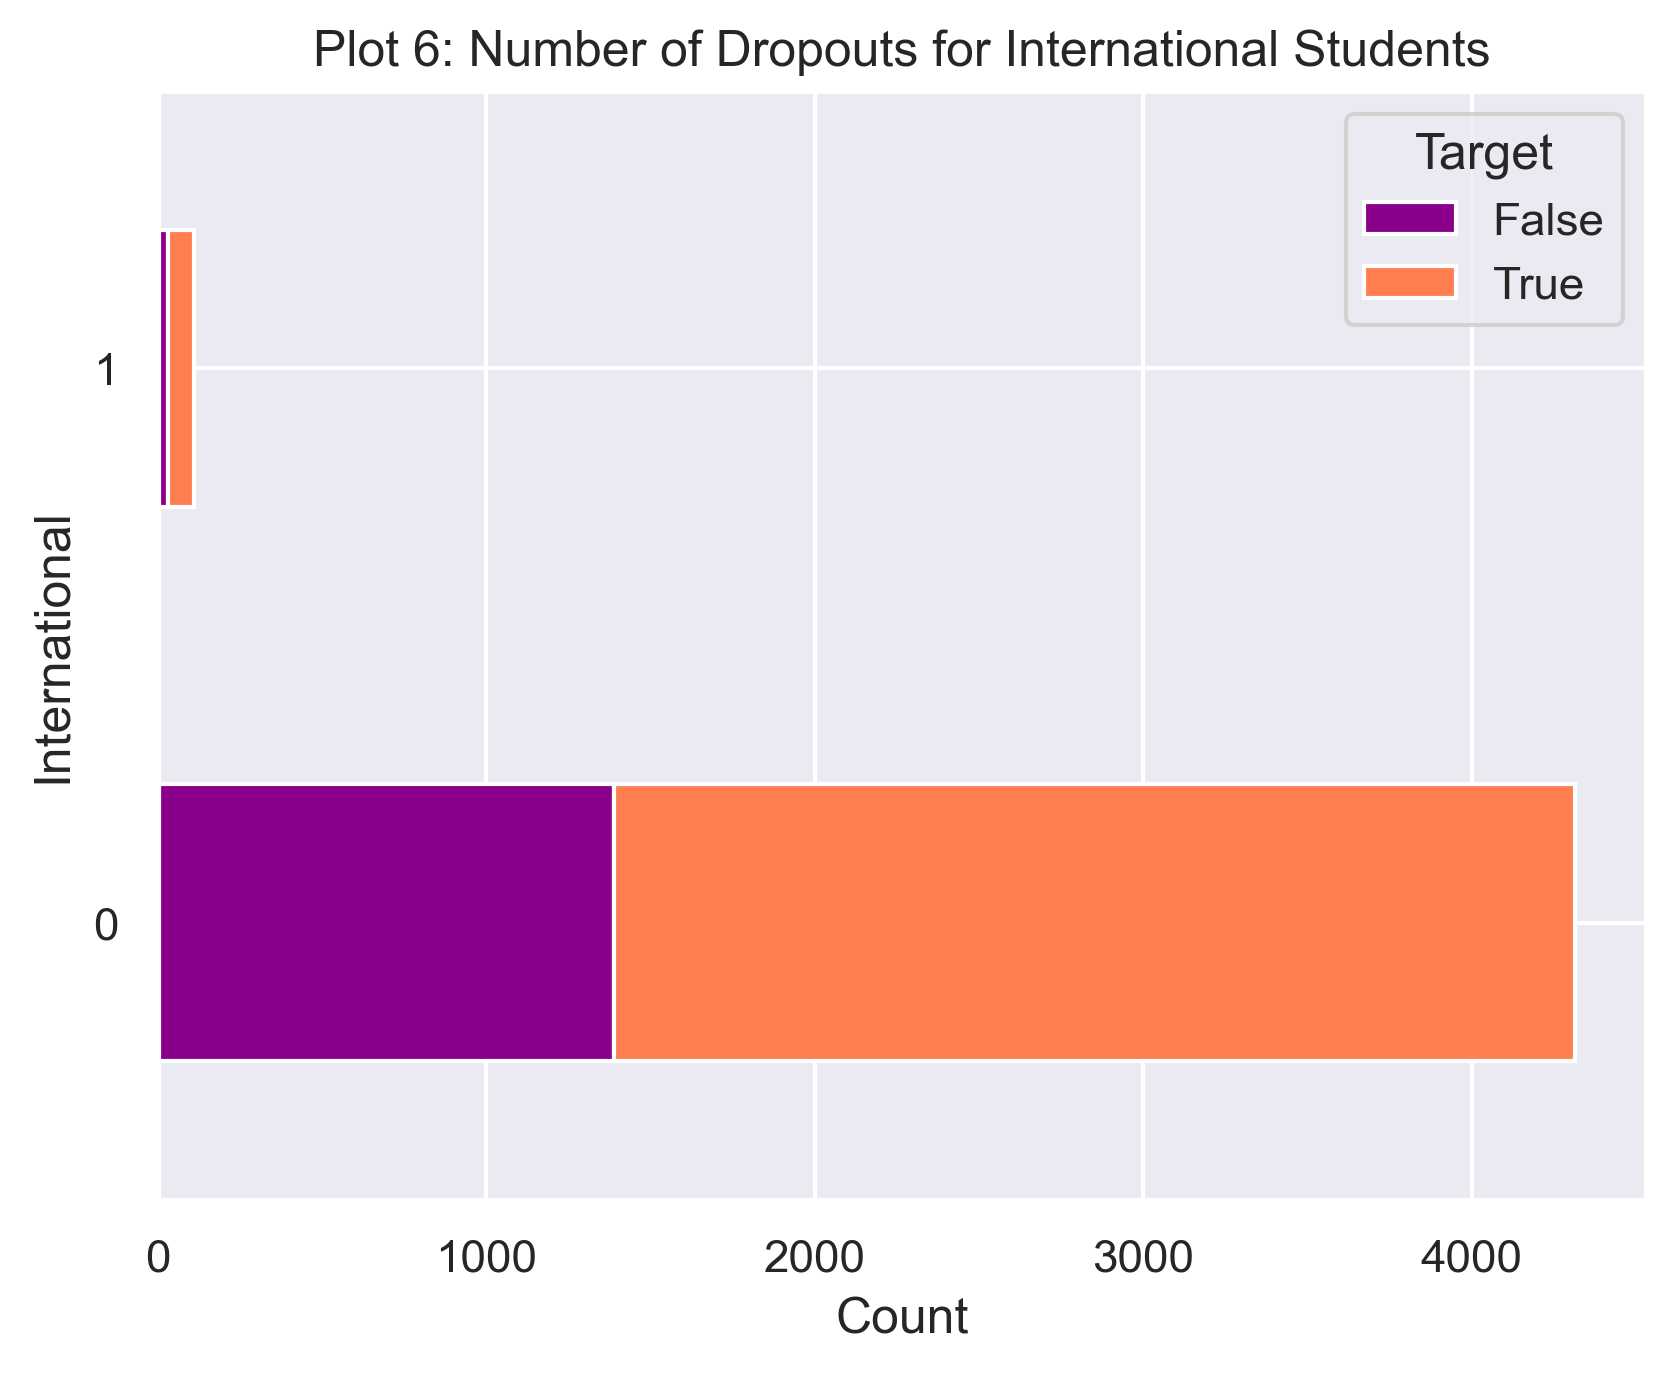

In [35]:
fig, ax = plt.subplots(dpi=300)

survival = pd.crosstab(
    [df_inter['International']],
    df_inter['Target'].astype(bool)
    )
survival.plot(kind='barh', stacked=True, ax=ax, color=['darkmagenta', 'coral'])
ax.set_xlabel('Count')
ax.set_ylabel('International')
ax.set_title('Plot 6: Number of Dropouts for International Students')
plt.show()

Plot 6 highlights one possible reason why the International feature may not be effective: there is insufficient data on International students compared to non-International students. Before we can determine if being an International student is correlated with dropping out, we need to collected more data on International students.

## 3.2: Questions about the Data

### 3.2.1: What impact does Nationality (race) have on predicting whether a student will drop out?
Sub-question: Which other variables are strongly correlated with Nationality and could introduce racial bias into the algorithm?

When training a classification algorithm to predict whether or not a student will drop out, it is crucial to exclude factors like Race and Nationality to prevent the model from developing biases towards specific racial groups. However, simply removing Nationality as a feature may not be enough, as other variables strongly correlated with race could still introduce bias into the algorithm. As a result, we need to identify which other variables could potentially introduce racial bias into the algorithm.


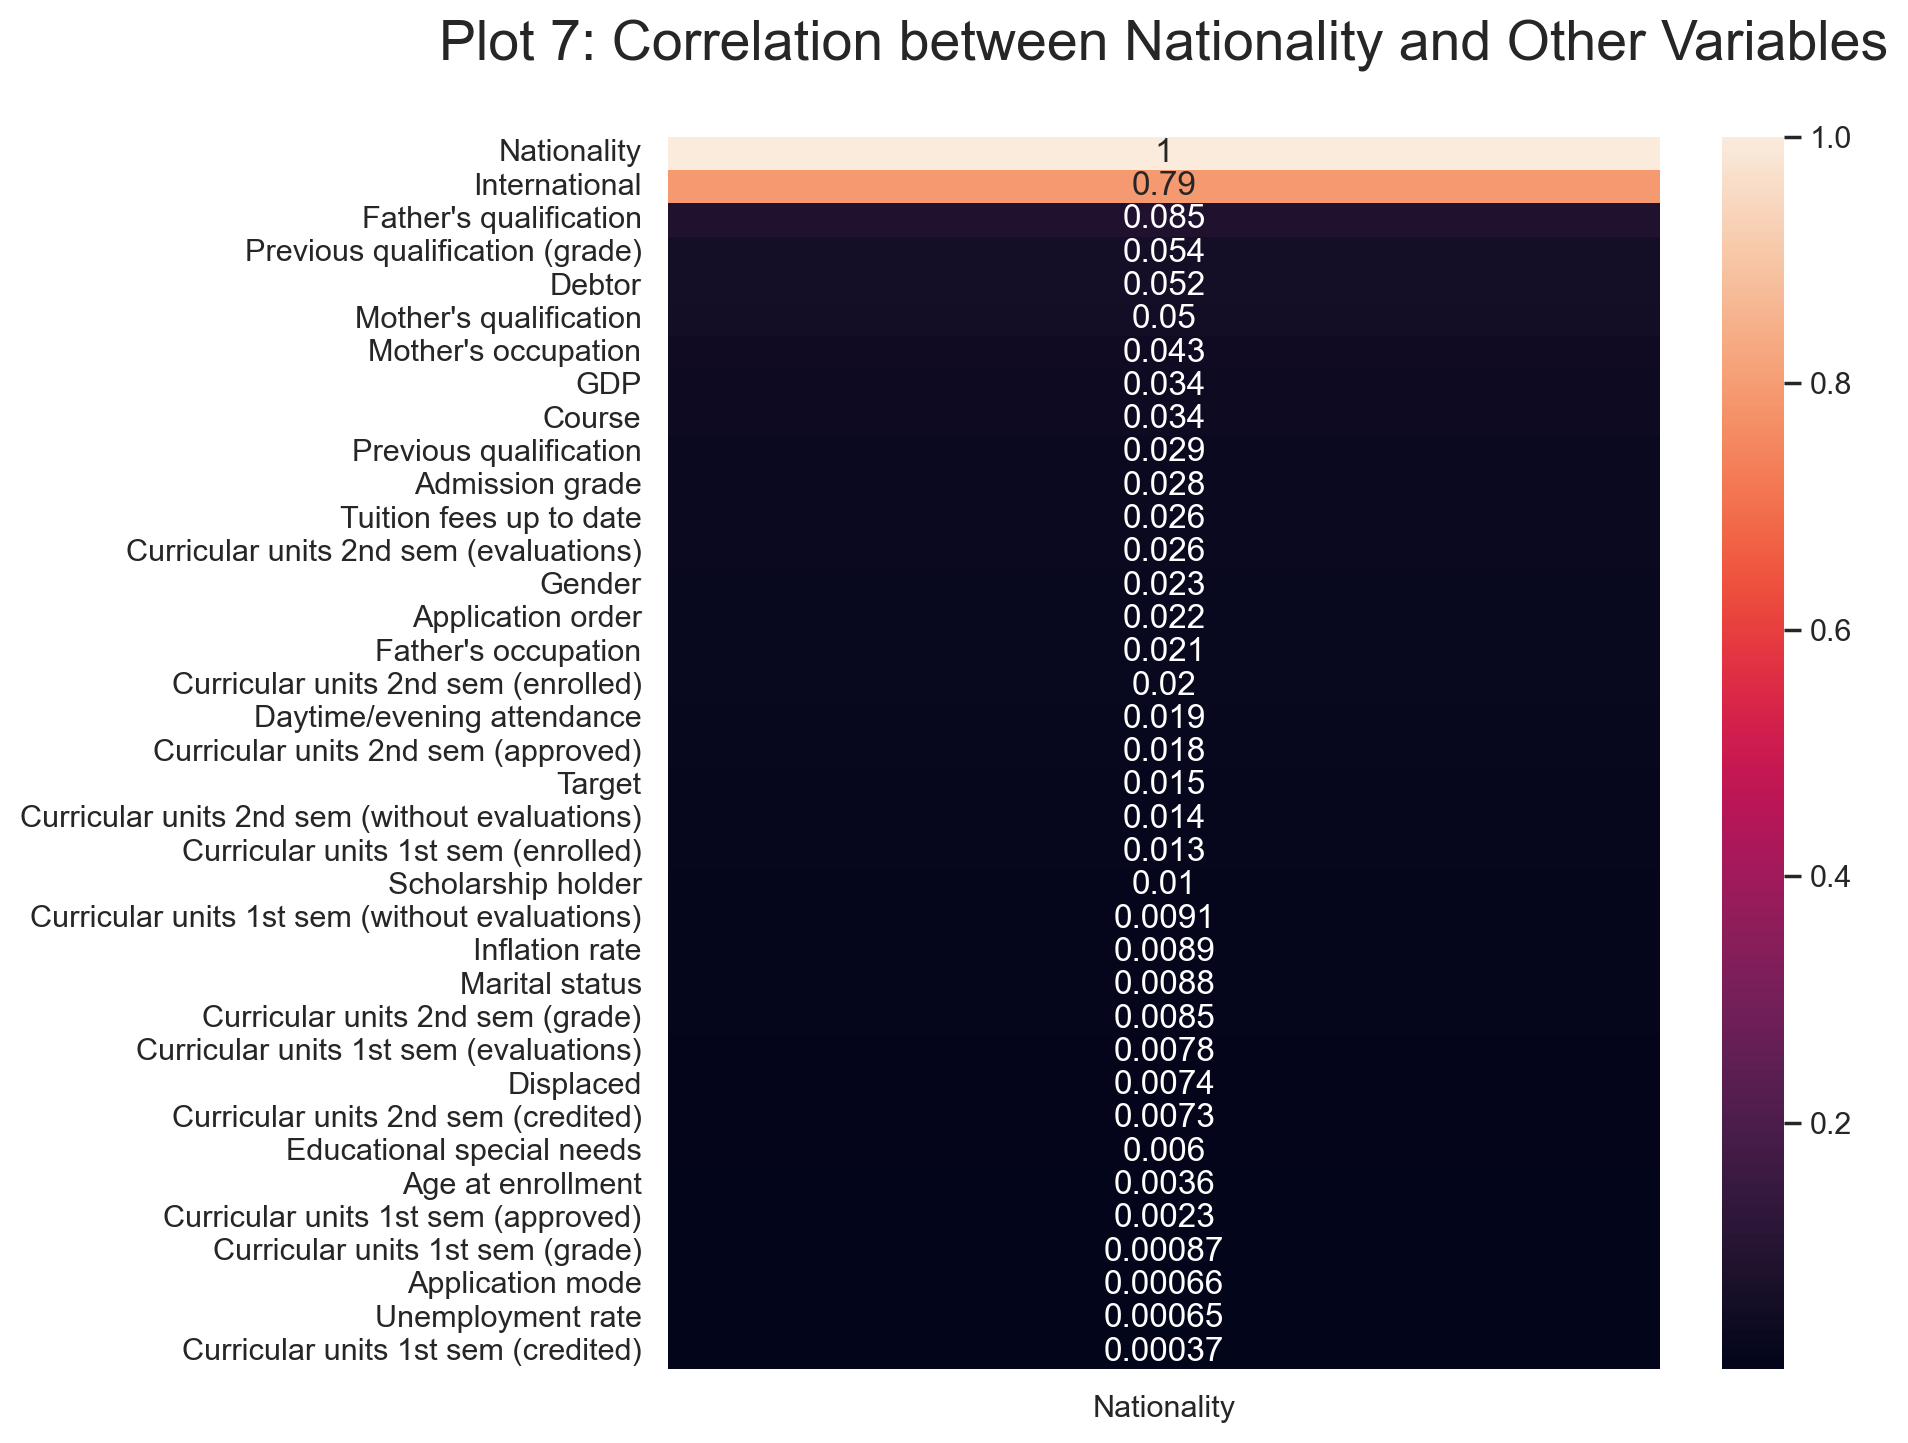

In [20]:
cmap = sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(8, 8), dpi=200)
sns.heatmap(df.corr()[['Nationality']].abs().sort_values(by='Nationality',ascending=False), cmap=cmap, annot=True);
ax.set_title("Plot 7: Correlation between Nationality and Other Variables\n", fontsize=20);


The correlation table shows that Nationality has a positive correlation with the International feature. However, Nationality has a weak correlation with the other features in the dataset, including the Target label we are trying to predict. As a result, removing Nationality and International as features from the classification algorithm will likely not have a substantial impact on the prediction accuracy.

### 3.2.2: Which features will have the most substantial impact on predicting whether a student will drop out?

We need to identify which features are correlated with the Target label variable we are trying to predict. Features with low correlation have a weak relationship with the Target variable and are less significant in the classification algorithm.  Features with too high of a correlation do not add extra information that can help to improve our algorithm. 

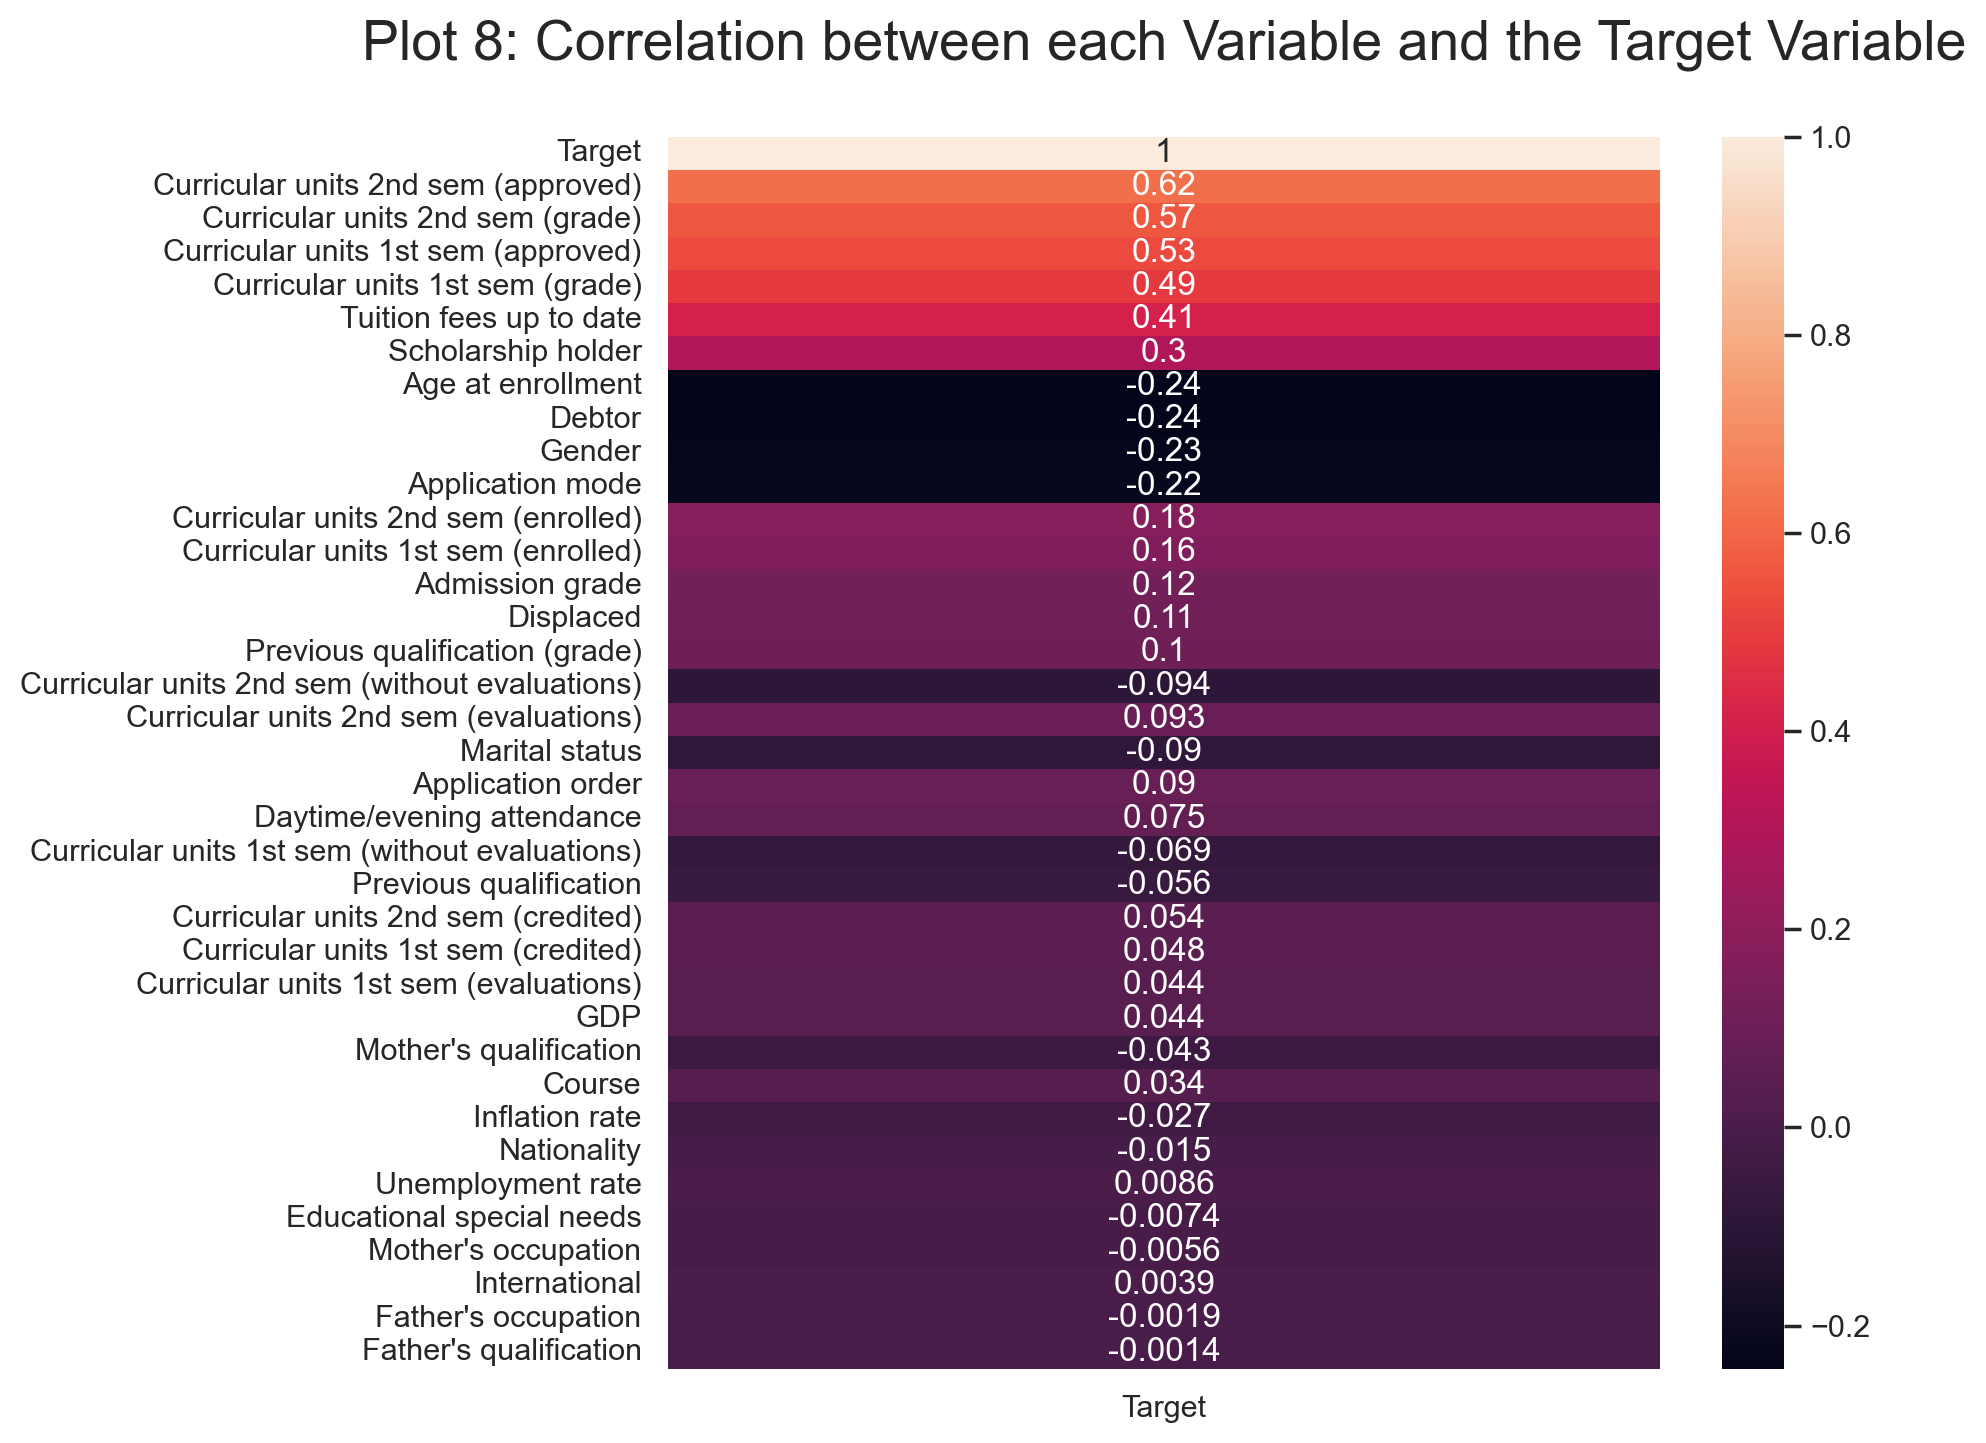

In [21]:
df_target = df.corr()[['Target']]
df_target['abs(Target)'] = df_target['Target'].abs()

cmap = sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(8, 8), dpi=200)

# Sort the Correlation Coefficients by its Magnitude but output the raw Correlation Coefficient.
sns.heatmap(pd.DataFrame(df_target.sort_values(by='abs(Target)', ascending=False)['Target']), cmap=cmap, annot=True);
ax.set_title("Plot 8: Correlation between each Variable and the Target Variable\n", fontsize=20);


The correlation table is ordered from the features with the strongest correlation (in magnitude) to those with the weakest correlation. A feature with a positive correlation is correlated with a lower chance to drop out; a feature with a negative correlation is correlated with a high chance to drop out.</br>

The features most strongly correlated with a lower chance of dropping out involved...
1. Academic Grades:</br>
   Passing (approving) more courses and having higher average grades in their first and second semesters were correlated with a lower chance of dropping out.
2. Financial Stability:</br>
   Keeping tuition fees up to date and holding scholarships were correlated with a lower chance of dropping out. Having debt was correlated with a higher chance of dropping out.
3. Some Factors like Age at enrollment and Gender that are known at the time of application.

The correlation table not strongly correlated with the Target variable included economic variables like GDP, inflation rate, and unemployment rate.


### 3.2.3: Which combinations of Gender and Age at enrollment have the highest chance of dropping out?

From the Question 3.2.2, we determined that Gender and Age at enrollment were some of the features that were negatively correlated with dropping out. As a result, it would be interesting to determine which combinations of Gender and Age are associated with the highest chance of dropping out and to identify some potential reasons why this combination has the highest chance.

In [23]:
df_slim = df[['Gender', 'Age at enrollment', 'Target']].copy()
df_slim['Age Ranges'] = pd.cut(
    df_slim['Age at enrollment'],
    [0,18,19,20,22,25,29,39,100],
    labels=['17-18', '19', '20', '21-22', '23-25', '26-29', '30-39', '40+']
)
df_slim['Gender'].replace({0:'Female', 1:'Male'}, inplace=True)
df_slim['Target'].replace({2:0, 3:0}, inplace=True)
df_slim['Target'].replace({0:1, 1:0}, inplace=True)
# Dropouts = 0, Non-Dropouts = 1


We split Age at enrollment into several Age Ranges:
- 17-18: Entered higher education right after finishing secondary education (high school).
- 19: Entered higher education 1 year after finishing secondary education.
- 20: Entered higher education 2 years after finishing secondary education.
- 21-22
- 23-25
- 26-29
- Thirties
- Forties and Above

Gender was split into Male and Female.

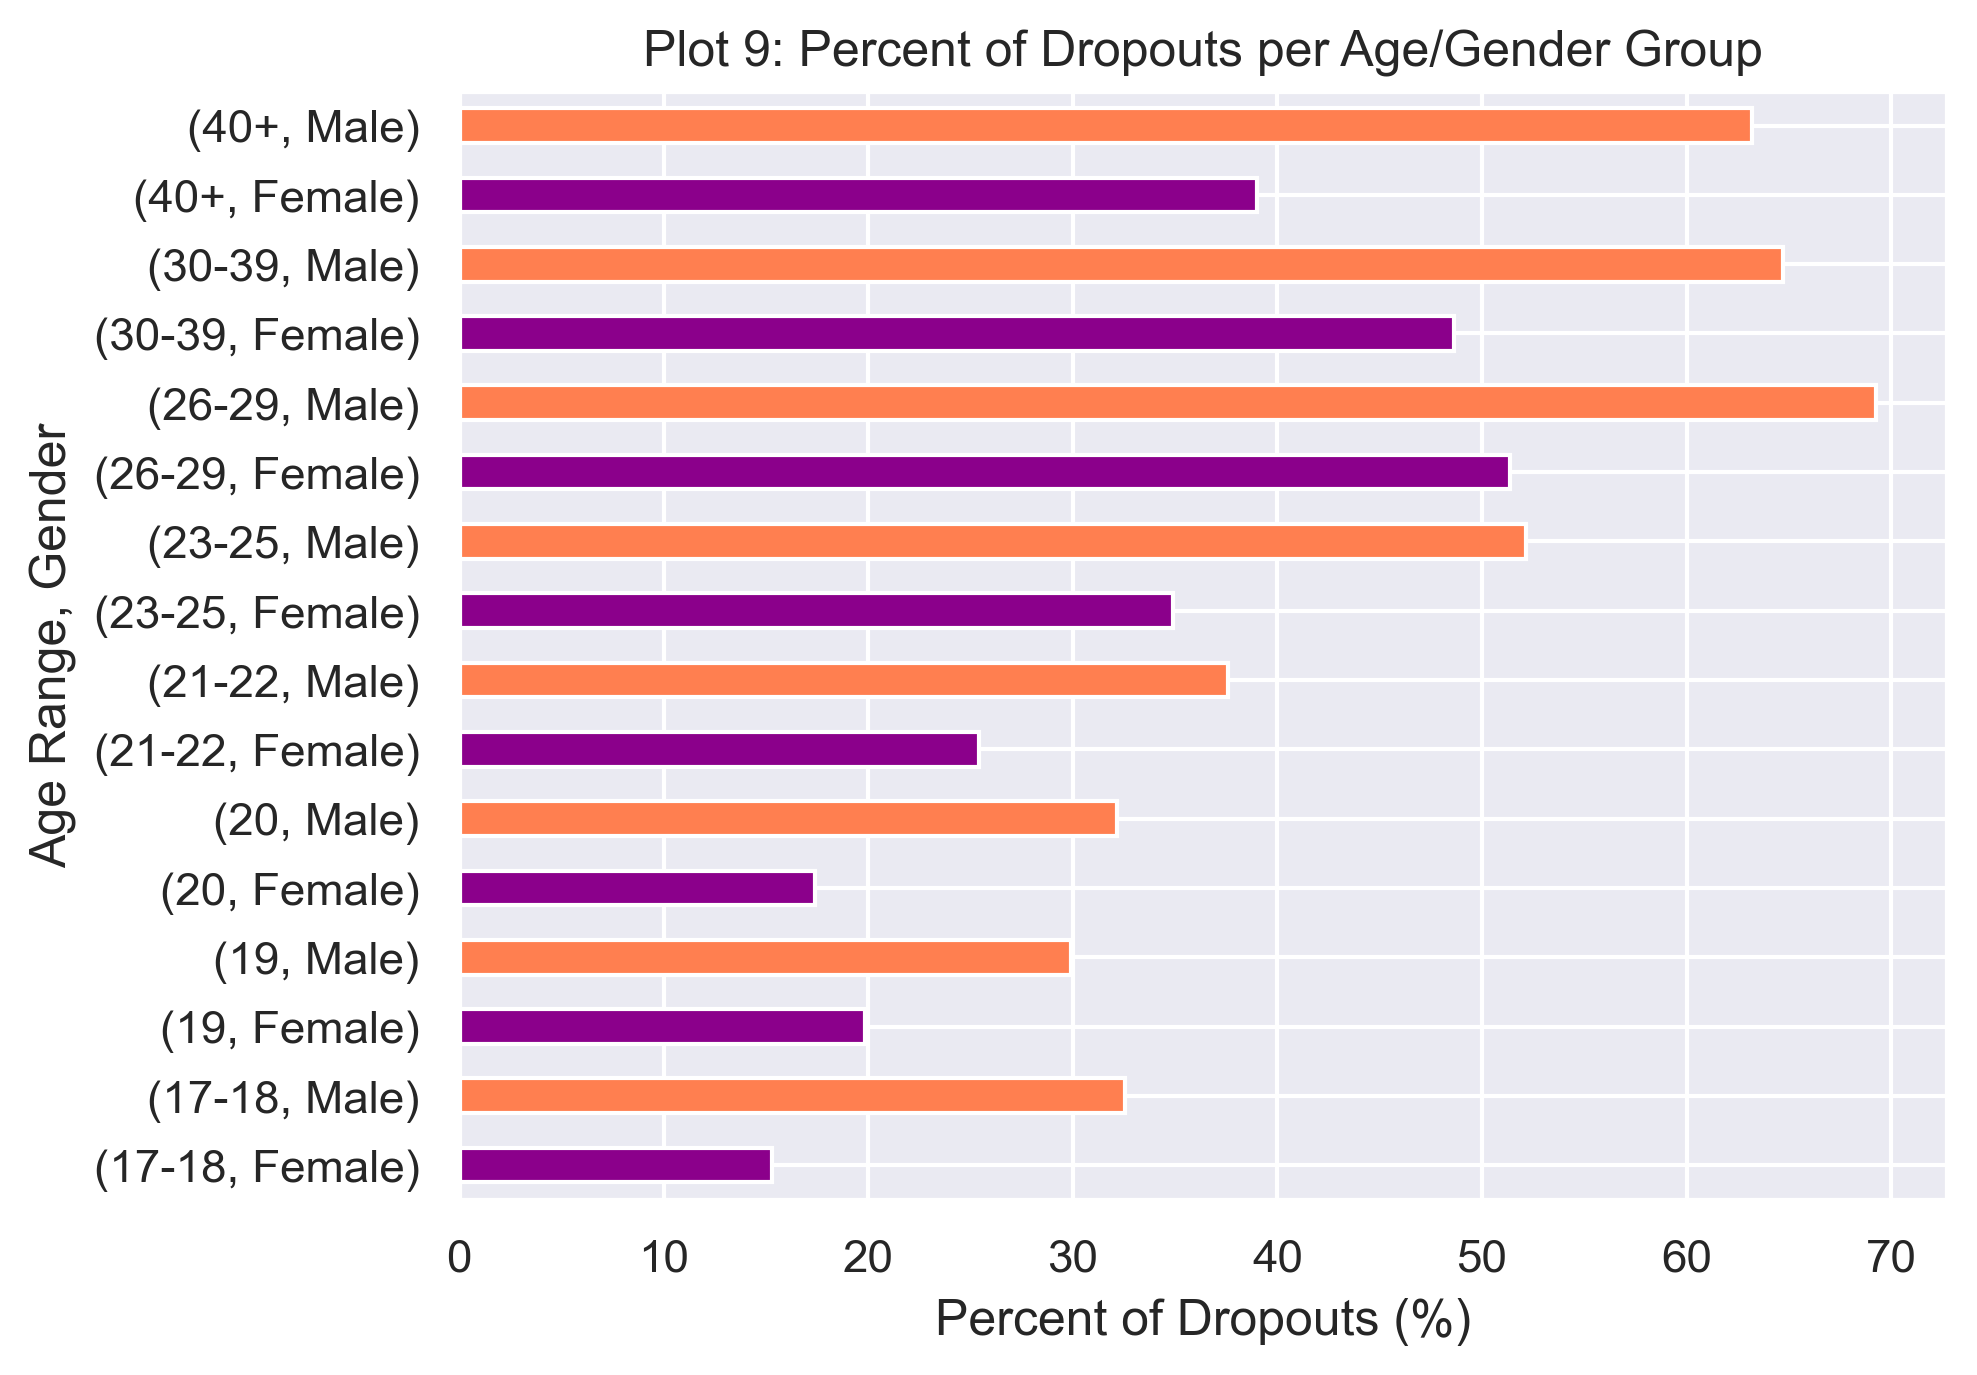

In [24]:
fig, ax = plt.subplots(dpi=300)
df_grouped = df_slim.groupby(by=['Age Ranges','Gender'])
dropout_percent = 100 * (1 - (df_grouped['Target'].sum() / df_grouped['Target'].count()))
colors=['darkmagenta', 'coral']

ax = dropout_percent.plot(kind='barh', color=colors)
ax.set_ylabel('Age Range, Gender');
ax.set_xlabel('Percent of Dropouts (%)');
ax.set_title('Plot 9: Percent of Dropouts per Age/Gender Group');

The plot reveals that men aged 26-29 had the highest percentage of dropouts, closely followed by men in their thirties and forties. Across all age ranges, men had a higher percentage of dropouts than women, reinforcing the correlation between gender and the chances of dropping out discussed in Section 3.2.2. For both genders, the percent of dropouts generally increased with age, peaking at the 26-29 age range. After this peak, the percent of dropouts declined as age continued to increase.

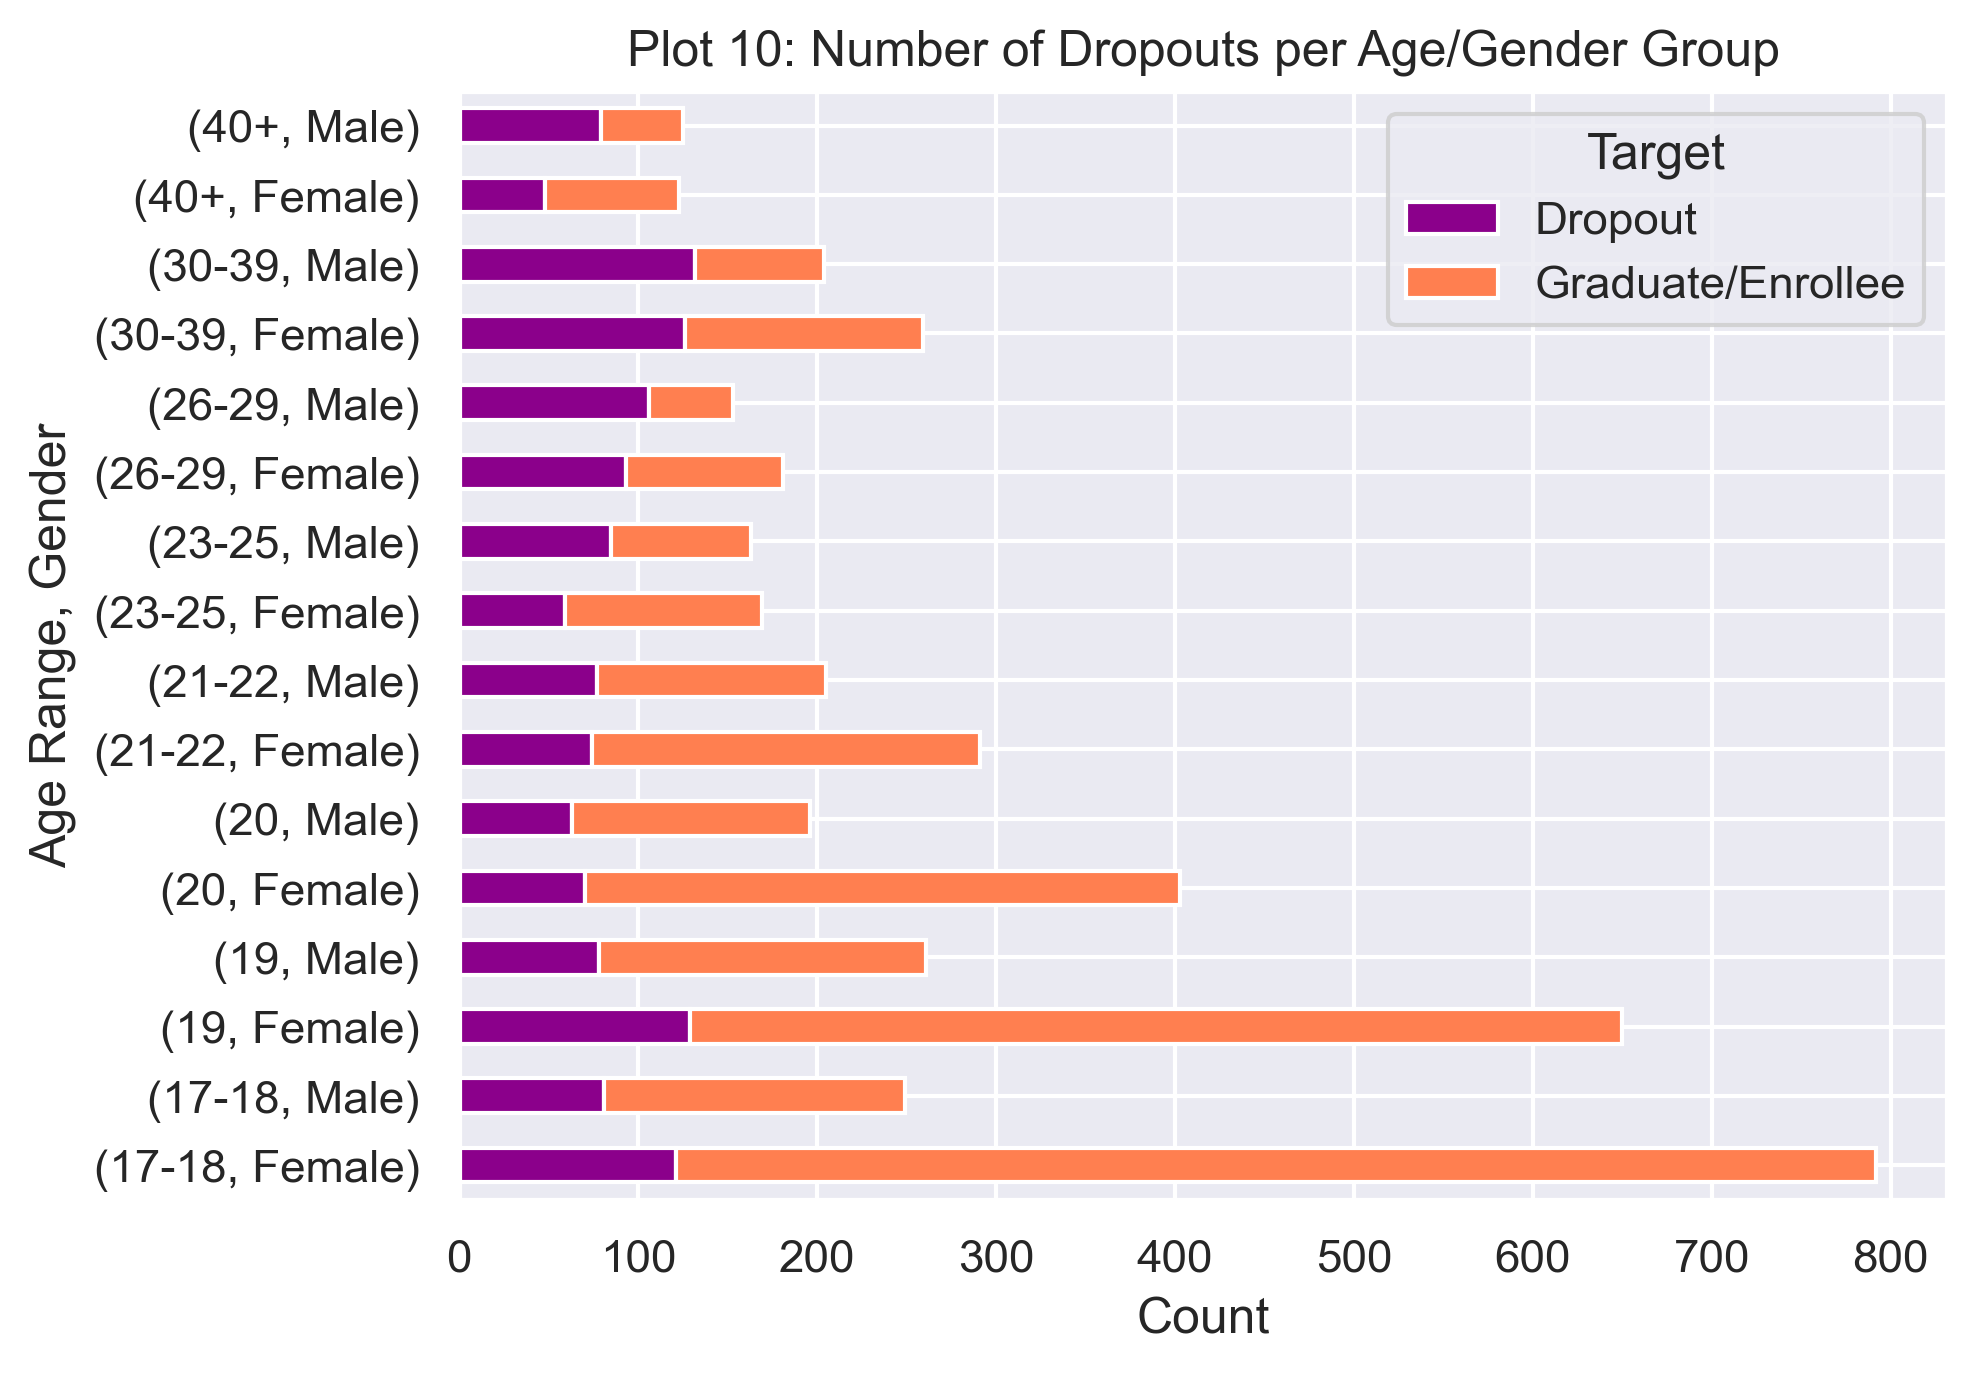

In [54]:
fig, ax = plt.subplots(dpi=300)

survival = pd.crosstab(
    [df_slim['Age Ranges'], df_slim['Gender']],
    df_slim['Target'].astype(bool)
    )
survival.plot(kind='barh', stacked=True, ax=ax, color=['darkmagenta', 'coral'])
ax.legend(['Dropout', 'Graduate/Enrollee'], title='Target')
ax.set_ylabel('Age Range, Gender')
ax.set_xlabel('Count')
ax.set_title('Plot 10: Number of Dropouts per Age/Gender Group')
plt.show()

The plot reveals a potential reason why there may be a disparity in the percent of dropouts for men and women at younger age ranges. The number of male students is less than the number of female students for younger age ranges. As a result, even though men have less dropouts than women in younger age ranges, the percent of dropouts is higher for men.

### 3.2.4: Extra Question

</br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br>